<img src="https://upload.wikimedia.org/wikipedia/commons/6/6e/Stöwer_Titanic.jpg" alt="The Titanic sinking on her maiden voyage" title="The Dietanic" />

# Testing Classification & Regression Models for the Titanic Dataset

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
from random import randint
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split,cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from collections import defaultdict
from sklearn import metrics, cross_validation
import patsy
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.grid_search import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


/Users/alnick06/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/alnick06/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/alnick06/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  

In [2]:
testset=pd.read_csv('Kaggletitanic_test.csv')
testset.reset_index(inplace=True)

In [3]:
trainset=pd.read_csv('Kaggletitanic_train.csv')
trainset.reset_index(inplace=True)

## Exploratory Data Analysis
### **Defining the problem**- The Titanic dataset has a variety of different features and missing values. We need to clean the data to analyze and create a well oiled model to predict who will die and who will survive. 

In [4]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
index          891 non-null int64
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [5]:
trainset.columns

Index(['index', 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
trainset['Age'].value_counts()[10:]

10.00    2
64.00    2
40.50    2
32.50    2
45.50    2
20.50    1
24.50    1
0.67     1
14.50    1
0.92     1
74.00    1
34.50    1
80.00    1
12.00    1
36.50    1
53.00    1
55.50    1
70.50    1
66.00    1
23.50    1
0.42     1
Name: Age, dtype: int64

In [7]:
trainset['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [8]:
trainset.drop(['index'],axis=1,inplace=True)

In [9]:
testset.drop(['index'],axis=1,inplace=True)

In [10]:
trainset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
trainset[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)# Females have a 55% more of a chance of living than men

,Sex,Survived
0,female,0.742038
1,male,0.188908


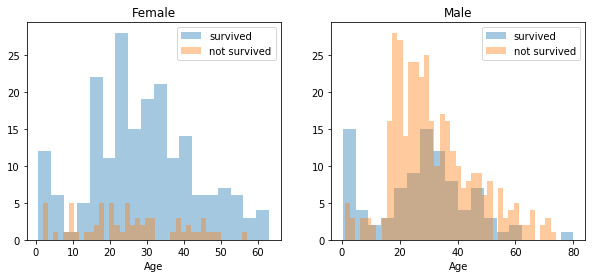

In [12]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = trainset[trainset['Sex']=='female']
men = trainset[trainset['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

In [13]:
trainset[["Age", "Survived"]].groupby(['Age'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Age,Survived
0,0.42,1.000000
9,5.00,1.000000
79,63.00,1.000000
68,53.00,1.000000
1,0.67,1.000000
17,13.00,1.000000
16,12.00,1.000000
87,80.00,1.000000
2,0.75,1.000000
4,0.92,1.000000


In [14]:
trainset[["Fare", "Survived"]].groupby(['Fare'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Fare,Survived
247,512.3292,1.0
196,57.9792,1.0
89,13.8583,1.0
88,13.7917,1.0
86,13.4167,1.0
83,12.6500,1.0
81,12.4750,1.0
79,12.2875,1.0
194,56.9292,1.0
77,12.0000,1.0


In [15]:
trainset[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [16]:
trainset[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [17]:
trainset[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [18]:
trainset.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [19]:
trainset['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
5                                       Moran, Mr. James
6                                McCarthy, Mr. Timothy J
7                         Palsson, Master. Gosta Leonard
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
12                        Saundercock, Mr. William Henry
13                           Andersson, Mr. Anders Johan
14                  Vestrom, Miss. Hulda Amanda Adolfina
15                      Hewlett, Mrs. (Mary D Kingcome) 
16                                  Rice, Master. Eugene
17                          Wil

In [20]:
mean_value=trainset['Age'].mean()
trainset['Age']=trainset['Age'].fillna(mean_value)

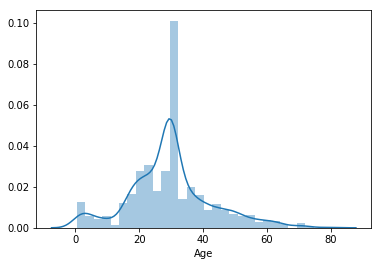

In [21]:
sns.distplot(trainset['Age'])

In [22]:
trainset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [23]:
trainset.drop(['Ticket','Cabin'],axis=1,inplace=True)
testset.drop(['Ticket','Cabin'],axis=1,inplace=True)

In [24]:
trainset1=pd.get_dummies(trainset['Sex'])
df=trainset1.join(trainset)

In [25]:
df.drop(['Sex'],axis=1,inplace=True)

In [26]:
df['Embarked']=df['Embarked'].fillna('S')

In [27]:
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

In [28]:
df.Embarked.isnull().any()

False

In [29]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [30]:
df.Fare.isnull().any()

False

In [31]:
pd.set_option('display.max_rows',800)

In [32]:
df.loc[ df['Fare'] <= 7.91, 'Fare'] 						        = 0
df.loc[(df['Fare'] > 7.91) & (df['Fare'] <= 14.454), 'Fare'] = 1
df.loc[(df['Fare'] > 14.454) & (df['Fare'] <= 31), 'Fare']   = 2
df.loc[ df['Fare'] > 31, 'Fare'] 							        = 3
df['Fare'] = df['Fare'].astype(int)

In [33]:
df.reset_index(inplace=True)

In [34]:
df['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [35]:
lister=[]
for x in df['Age']:
    lister.append(int(x))
df['Age']=lister
    

In [36]:
agelist=[]
for x in df['Age']:
    if x in range(0,23):
        agelist.append(0)
    elif x in range(23,32):
        agelist.append(1)
    elif x in range(32,38):
        agelist.append(3)
    elif x in range(38,81):
        agelist.append(4)
    else:
        agelist.append('No dice')
df['Ages']=agelist

In [37]:
df['Age'].std()

13.013778302447077

In [38]:
df['Age'].mean()

29.544332210998878

In [39]:
df['Intercept']=1

In [40]:
df.columns

Index(['index', 'female', 'male', 'PassengerId', 'Survived', 'Pclass', 'Name',
       'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Ages', 'Intercept'],
      dtype='object')

In [41]:
testset.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [42]:
drop_elements =['PassengerId', 'Name',  'Age', 'SibSp','Parch','index']

In [43]:
train = df.drop(drop_elements, axis = 1)

In [44]:
mean_value=testset['Age'].mean()
testset['Age']=testset['Age'].fillna(mean_value)#filling in testset age with mean vals

In [45]:
median_value=testset['Fare'].median()
testset['Fare']=testset['Fare'].fillna(median_value)

In [46]:
testset['Fare'].describe()

count    418.000000
mean      35.576535
std       55.850103
min        0.000000
25%        7.895800
50%       14.454200
75%       31.471875
max      512.329200
Name: Fare, dtype: float64

In [47]:
testset['Fare']

0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
5        9.2250
6        7.6292
7       29.0000
8        7.2292
9       24.1500
10       7.8958
11      26.0000
12      82.2667
13      26.0000
14      61.1750
15      27.7208
16      12.3500
17       7.2250
18       7.9250
19       7.2250
20      59.4000
21       3.1708
22      31.6833
23      61.3792
24     262.3750
25      14.5000
26      61.9792
27       7.2250
28      30.5000
29      21.6792
30      26.0000
31      31.5000
32      20.5750
33      23.4500
34      57.7500
35       7.2292
36       8.0500
37       8.6625
38       9.5000
39      56.4958
40      13.4167
41      26.5500
42       7.8500
43      13.0000
44      52.5542
45       7.9250
46      29.7000
47       7.7500
48      76.2917
49      15.9000
50      60.0000
51      15.0333
52      23.0000
53     263.0000
54      15.5792
55      29.1250
56       7.8958
57       7.6500
58      16.1000
59     262.3750
60       7.8958
61      13.5000
62      

In [48]:
testset.Fare.isnull().any()

False

In [49]:
testset.loc[testset['Fare'] <= 7.91, 'Fare'] 						        = 0
testset.loc[(testset['Fare'] > 7.91) & (testset['Fare'] <= 14.454), 'Fare'] = 1
testset.loc[(testset['Fare'] > 14.454) & (testset['Fare'] <= 31), 'Fare']   = 2
testset.loc[testset['Fare'] > 31, 'Fare'] 							        = 3
testset['Fare'] = testset['Fare'].astype(int)

In [50]:
testset1=pd.get_dummies(testset['Sex'])

In [51]:
tester=testset1.join(testset)

In [52]:
tester.loc[tester['Fare'] <= 7.91, 'Fare'] 						        = 0
tester.loc[(tester['Fare'] > 7.91) & (tester['Fare'] <= 14.454), 'Fare'] = 1
tester.loc[(tester['Fare'] > 14.454) & (tester['Fare'] <= 31), 'Fare']   = 2
tester.loc[tester['Fare'] > 31, 'Fare'] 							        = 3
tester['Fare'] = tester['Fare'].astype(int)

In [53]:
tester['Embarked']=tester['Embarked'].fillna('S')

In [54]:
tester['Embarked'] = tester['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

In [55]:
lister1=[]
for x in tester['Age']:
    lister1.append(int(x))
tester['Age']=lister1

In [56]:
agelist1=[]
for x in tester['Age']:
    if x in range(0,23):
        agelist1.append(0)
    elif x in range(23,32):
        agelist1.append(1)
    elif x in range(32,38):
        agelist1.append(3)
    elif x in range(38,81):
        agelist1.append(4)
    else:
        agelist1.append('No dice')
tester['Ages']=agelist1

In [57]:
tester.head()

,female,male,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Ages
0,0,1,892,3,"Kelly, Mr. James",male,34,0,0,0,2,3
1,1,0,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,0,0,4
2,0,1,894,2,"Myles, Mr. Thomas Francis",male,62,0,0,0,2,4
3,0,1,895,3,"Wirz, Mr. Albert",male,27,0,0,0,0,1
4,1,0,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,0,0,0


In [58]:
tester.columns

Index(['female', 'male', 'PassengerId', 'Pclass', 'Name', 'Sex', 'Age',
       'SibSp', 'Parch', 'Fare', 'Embarked', 'Ages'],
      dtype='object')

In [59]:
drop_elements2 =['PassengerId', 'Name',  'Age', 'SibSp','Parch','Sex']

In [60]:
test = tester.drop(drop_elements2, axis = 1)

In [61]:
trainer=train.loc[:, train.columns != 'Survived']

## Baseline Model

In [62]:
X=trainer
y=train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.50)

In [63]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,

In [64]:
print(clf.coef_)

[[ 1.69741335 -0.62122771 -1.11728511 -0.11656062  0.16022713 -0.20630401
   1.07618564]]


In [65]:
from sklearn.metrics import confusion_matrix
conmat = np.array(confusion_matrix(y_test, y_pred, labels=[0,1]))
confusion = pd.DataFrame(conmat, index=['Did Not Survive', 'Survived'],
                         columns=['Predicted Dead','Predicted Alive'])
print(confusion)

                 Predicted Dead  Predicted Alive
Did Not Survive             232               38
Survived                     51              125


In [66]:
target_names=['Dead','Alive']
print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

       Dead       0.82      0.86      0.84       270
      Alive       0.77      0.71      0.74       176

avg / total       0.80      0.80      0.80       446



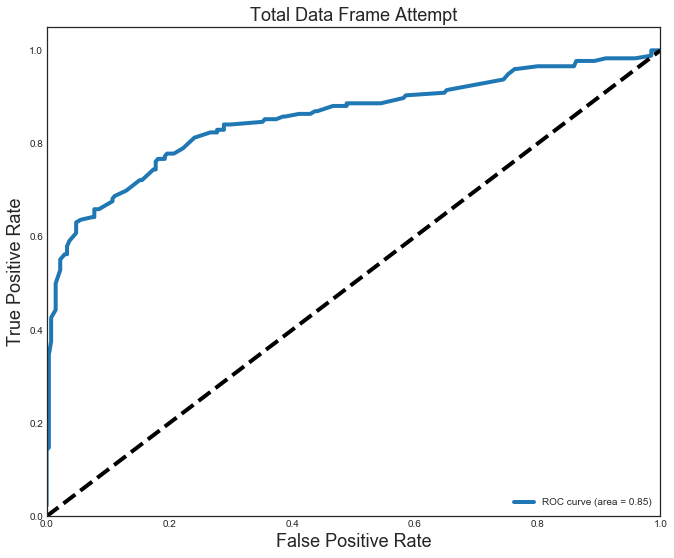

In [67]:
plt.style.use('seaborn-white')
%matplotlib inline


Y_score = clf.decision_function(X_test)

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(y_test, Y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Total Data Frame Attempt', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [68]:
clf.score(X, y)

0.7912457912457912

In [69]:
pd.DataFrame(list(zip(X.columns, np.transpose(clf.coef_))))

,0,1
0,female,[1.6974133480350244]
1,male,[-0.6212277127498979]
2,Pclass,[-1.117285112314946]
3,Fare,[-0.1165606204217986]
4,Embarked,[0.16022713498136676]
5,Ages,[-0.20630400563707127]
6,Intercept,[1.0761856352851158]


## Scaling Attempt


In [70]:
scaler = StandardScaler()
scaler.fit(trainer)
StandardScaler(copy=True, with_mean=True, with_std=True)
(scaler.mean_)
(scaler.transform(trainer))

array([[-0.73769513,  0.73769513,  0.82737724, ..., -0.56883712,
        -1.06349171,  0.        ],
       [ 1.35557354, -1.35557354, -1.56610693, ...,  1.00518113,
         1.60572269,  0.        ],
       [ 1.35557354, -1.35557354,  0.82737724, ..., -0.56883712,
        -0.39618811,  0.        ],
       ...,
       [ 1.35557354, -1.35557354,  0.82737724, ..., -0.56883712,
        -0.39618811,  0.        ],
       [-0.73769513,  0.73769513, -1.56610693, ...,  1.00518113,
        -0.39618811,  0.        ],
       [-0.73769513,  0.73769513,  0.82737724, ...,  2.57919938,
         0.93841909,  0.        ]])

In [71]:
X=trainer
y=train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.50)

In [72]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [73]:
from sklearn.metrics import confusion_matrix
conmat = np.array(confusion_matrix(y_test, y_pred, labels=[0,1]))
confusion = pd.DataFrame(conmat, index=['Did Not Survived', 'Survived'],
                         columns=['Predicted Dead','Predicted Alive'])
print(confusion)

                  Predicted Dead  Predicted Alive
Did Not Survived             226               57
Survived                      43              120


In [74]:
clf.score(X, y) #Better

0.77665544332211

## Attempt 2 Cross Val

In [75]:
lr = LogisticRegression()
lr_model = lr.fit(X_train, y_train)
lr_ypred = lr_model.predict(X_test)

In [76]:
cvs1 = cross_val_score(lr, X, y, cv=5)
cvs1

array([0.79888268, 0.80446927, 0.78089888, 0.75842697, 0.79096045])

In [77]:
cvs1.mean()

0.7867276499962585

## Trying out Lasso Regression

In [78]:
lr_l1 = LogisticRegression(C=10,penalty='l1')
lr_l1_model = lr_l1.fit(X_train, y_train)
lr_l1_ypred = lr_l1_model.predict(X_test)

In [79]:
print (classification_report(y_test, lr_l1_ypred, labels=lr_l1.classes_))

             precision    recall  f1-score   support

          0       0.84      0.80      0.82       283
          1       0.68      0.74      0.71       163

avg / total       0.78      0.78      0.78       446



In [80]:
cvs2 = cross_val_score(lr_l1, X, y, cv=5)
print (cvs2.mean())
print (cvs1.mean()) #Small improvement 

0.7889873951472222
0.7867276499962585


## Auto Tuning


In [81]:
logreg = LogisticRegression(solver='liblinear')
C_vals = [0.0001, 0.001, 0.01, 0.1, .15, .25, .275, .33, 0.5, .66, 0.75, 1.0, 2.5, 5.0, 10.0, 100.0, 1000.0]
penalties = ['l1','l2']

gs = GridSearchCV(logreg, {'penalty': penalties, 'C': C_vals},\
                  verbose=False, cv=3)
gs.fit(X,y)

GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.0001, 0.001, 0.01, 0.1, 0.15, 0.25, 0.275, 0.33, 0.5, 0.66, 0.75, 1.0, 2.5, 5.0, 10.0, 100.0, 1000.0]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=False)

In [137]:
logreg.score(X,y)

0.7845117845117845

In [82]:
gs.best_params_

{'C': 0.15, 'penalty': 'l1'}

In [83]:
logreg = LogisticRegression(C=gs.best_params_['C'],\
                            penalty=gs.best_params_['penalty'])
cv_model = logreg.fit(X_train, y_train)

cv_pred = cv_model.predict(X_test)

cm3 = confusion_matrix(y_test, cv_pred, labels=logreg.classes_)
cm3 = pd.DataFrame(cm3, columns=logreg.classes_, index=logreg.classes_)


cm3

,0,1
0,237,46
1,49,114


In [84]:
print (classification_report(y_test, cv_pred,\
                            labels=logreg.classes_))

             precision    recall  f1-score   support

          0       0.83      0.84      0.83       283
          1       0.71      0.70      0.71       163

avg / total       0.79      0.79      0.79       446



## KNN Model

In [85]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=12, weights='uniform')

knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=12, p=2,
           weights='uniform')

In [86]:
neighbors = [11,12,13,14,15,16,17,18]

for x in neighbors:
    knn = KNeighborsClassifier(n_neighbors=x, weights='uniform')
    knn.fit(X,y)
    predictions = knn.predict(X)
    print("K = ", x)
    print("Accuracy = ",accuracy_score(y, predictions))
    print("CV = ", cross_val_score(knn, X, y).mean())
    print("")

K =  11
Accuracy =  0.8271604938271605
CV =  0.7957351290684623

K =  12
Accuracy =  0.8226711560044894
CV =  0.8013468013468014

K =  13
Accuracy =  0.8204264870931538
CV =  0.7991021324354658

K =  14
Accuracy =  0.8181818181818182
CV =  0.8013468013468014

K =  15
Accuracy =  0.8181818181818182
CV =  0.7901234567901234

K =  16
Accuracy =  0.8170594837261503
CV =  0.7934904601571269

K =  17
Accuracy =  0.8080808080808081
CV =  0.7979797979797979

K =  18
Accuracy =  0.8170594837261503
CV =  0.7923681257014591



In [87]:
predictions = knn.predict(X_test)
accuracy_score(y_test, predictions)

0.8183856502242153

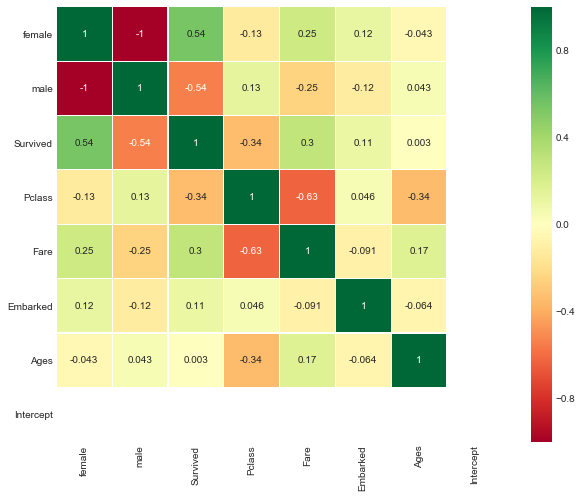

In [88]:
sns.heatmap(train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [89]:
test['Intercept']=1

In [105]:
X=trainer
y=train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.50)

In [107]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

87.42

In [108]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

param_grid = {'max_depth': np.arange(3, 10)}

tree = GridSearchCV(DecisionTreeClassifier(), param_grid)

tree.fit(X_train, y_train)
tree_preds = tree.predict_proba(X_test)[:, 1]
tree_performance = roc_auc_score(y_test, tree_preds)

print('DecisionTree: Area under the ROC curve = {}'.format(tree_performance))

DecisionTree: Area under the ROC curve = 0.8371868978805396


In [109]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

78.88

## Submission to Kaggle

In [93]:
submission = pd.DataFrame({"PassengerId": tester["PassengerId"],
"Survived": Y_pred})

In [94]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
